In [151]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('./Data/iris.csv')
class_mapping = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

# Apply the mapping to the 'variety' column
df['variety'] = df['variety'].map(class_mapping)
numflo = ["sepal.length", "sepal.width", "petal.length", "petal.width"]
df[numflo] = df[numflo].astype(float)
X = df.drop(['variety'], axis=1)
y = df['variety']
print(X)

     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [140]:
X['bias'] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [141]:
def gradient_descent(X, y, alpha, epochs):
    m, n = X.shape
    theta = np.zeros(n)

    for epoch in range(epochs):
        pred = np.dot(X, theta)
        err = pred - y
        gradient = (2/m) * (X.T.dot(err) + alpha * theta)
        theta = theta - alpha * gradient
        theta = theta.ravel()

    return theta

In [152]:
def mini_batch_gradient_descent(X, y, alpha, epochs, batch_size):
    m, n = X.shape
    theta = np.zeros(n)
    

    for epoch in range(epochs):
        for i in range(0, m, batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]

            pred = np.dot(X_batch, theta)
            err = pred - y_batch
            gradient = (2/batch_size) * (X_batch.T.dot(err) + alpha * theta)
            theta = theta - alpha * gradient
            theta = theta.ravel()

    return theta

In [153]:
def stochastic_gradient_descent(X, y, alpha, epochs):
    m, n = X.shape
    theta = np.zeros(n)

    for epoch in range(epochs):
        for i in range(m):
            X_i = X[i:i+1]
            y_i = y[i:i+1]

            pred = np.dot(X_i, theta)
            err = pred - y_i
            gradient = (2) * (X_i.T.dot(err) + alpha * theta)
            theta = theta - alpha * gradient

    return theta


In [154]:
alpha = 0.01 #learning rate
epochs = 1000
batch_size = 32

In [155]:
# Run Gradient Descent
gd = gradient_descent(X_train_std, y_train, alpha,  epochs)
w_gd_list= gd[1]
theta_gd = gd[0]

print("Theta (Gradient Descent):", theta_gd)


Theta (Gradient Descent): [-0.05508102 -0.04487717  0.35444322  0.45766121  0.        ]


In [156]:
# Run Mini-Batch Gradient Descent
mgd=mini_batch_gradient_descent(X_train_std, y_train, alpha,  epochs, batch_size)
theta_mini_batch= mgd[0]
w_mgd_list = [1]

print("Theta (Mini-Batch Gradient Descent):", theta_mini_batch)

Theta (Mini-Batch Gradient Descent): [-0.08194626 -0.03351167  0.41700899  0.4351577   0.        ]


In [157]:
# Run Stochastic Gradient Descent
sgd= stochastic_gradient_descent(X_train_std, y_train, alpha, epochs)
theta_stochastic =sgd[0]
w_sgd_list = sgd[1]

print("Theta (Stochastic Gradient Descent):", theta_stochastic)

Theta (Stochastic Gradient Descent): [ 0.03341045 -0.11693103  0.44252319  0.56146929  0.        ]


In [158]:
w_sgd_list=np.array(w_sgd_list)
w_mgd_list=np.array(w_mgd_list)
w_gd_list=np.array(w_gd_list)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

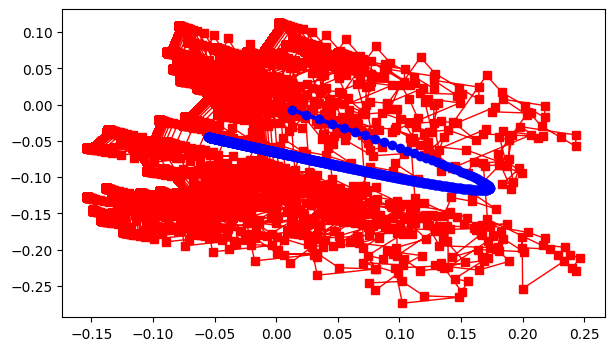

In [159]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(w_sgd_list[:, 0], w_sgd_list[:, 1], "r-s", linewidth=1,label="Stochastic")
plt.plot(w_gd_list[:, 0], w_gd_list[:, 1], "b-o", linewidth=3, label="Batch")
plt.plot(w_mgd_list[:, 0], w_mgd_list[:, 1], "g-+", linewidth=2,label="Mini-batch")
plt.legend(loc="upper left", fontsize=10)
plt.xlabel(r"$w_0$", fontsize=10)
plt.ylabel(r"$w_1$ ", fontsize=10, rotation=0)
plt.show()

